In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
os.chdir(r"C:\Users\Aniket\Desktop\INTENTION")
x_train=np.load('X_train_ML.npy')
y_train=np.load('Y_train_ML.npy')
x_vel=np.load("X_vel_ML.npy")
y_vel=np.load("Y_vel_ML.npy")
min_m=np.load("min_m_ML.npy")
max_m=np.load("max_m_ML.npy")



In [2]:
shape=x_train.shape
print("input shape:",shape)
Shapey=y_train.shape
print("output shape:",y_train.shape)
print("x_vel.shape",x_vel.shape)
print("y_vel.shape",y_vel.shape)
print("min_m.shape",min_m.shape)
print("max_m.shape",max_m.shape)

input shape: (129040, 500)
output shape: (129040, 75)
x_vel.shape (32261, 100, 5)
y_vel.shape (32261, 15, 5)
min_m.shape (1, 1, 5)
max_m.shape (1, 1, 5)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(500,),),
    keras.layers.Dense(32, activation='relu',),
    keras.layers.Dense(75, activation='linear')  
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                32064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 75)                2475      
                                                                 
Total params: 36619 (143.04 KB)
Trainable params: 36619 (143.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
3226/3226 [==============================] - 4s 1ms/step - loss: 3.0363 - val_loss: 2.6845
Epoch 2/100
3226/3226 [==============================] - 3s 1ms/step - loss: 2.5820 - val_loss: 2.5528
Epoch 3/100
3226/3226 [==============================] - 3s 989us/step - loss: 2.4601 - val_loss: 2.3989
Epoch 4/100
3226/3226 [==============================] - 3s 956us/step - loss: 2.3634 - val_loss: 2.3196
Epoch 5/100
3226/3226 [==============================] - 3s 957us/step - loss: 2.3073 - val_loss: 2.3098
Epoch 6/100
3226/3226 [==============================] - 3s 1ms/step - loss: 2.2605 - val_loss: 2.2860
Epoch 7/100
3226/3226 [==============================] - 3s 1ms/step - loss: 2.2189 - val_loss: 2.2532
Epoch 8/100
3226/3226 [==============================] - 3s 967us/step - loss: 2.1811 - val_loss: 2.2150
Epoch 9/100
3226/3226 [==============================] - 3s 981us/step - loss: 2.1473 - val_loss: 2.1721
Epoch 10/100
3226/3226 [==============================] - 3s 96

In [5]:

print("x_vel.shape",x_vel.shape)
x_val_reshaped = x_vel.reshape(-1, 500)
print("x_val_reshaped.shspe:",x_val_reshaped.shape)
y_pred = model.predict(x_val_reshaped)
y_val_reshaped=y_vel.reshape(-1,75)
print("y_val_reshaped.shspe:",y_val_reshaped.shape)

x_vel.shape (32261, 100, 5)
x_val_reshaped.shspe: (32261, 500)
1009/1009 [==============================] - 1s 1ms/step
y_val_reshaped.shspe: (32261, 75)


In [8]:
training_loss = model.evaluate(x_train, y_train)
training_mse = training_loss ** 2
print("Training MSE:", training_mse)


4033/4033 [==============================] - 5s 1ms/step - loss: 1.7013
Training MSE: 2.8942607455088023


In [9]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming you already have trained your model and obtained predictions for the training data
y_train_pred = model.predict(x_train)

# Calculate R-squared score for training data
r2_train = r2_score(y_train, y_train_pred)
print("Training R-squared score:", r2_train)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Training MAE:", mae_train)


4033/4033 [==============================] - 4s 1ms/step
Training R-squared score: 0.652699906277099
Training MAE: 0.7164080761911781


In [11]:
import numpy as np

# Assuming you have already trained the model and have access to x_train and y_train

# Predictions on training data
y_train_pred = model.predict(x_train)

# Calculate R-squared score for training data
y_train_mean = np.mean(y_train)
total_variation = np.sum((y_train - y_train_mean) ** 2)
residuals = np.sum((y_train - y_train_pred) ** 2)
training_r2 = 1 - (residuals / total_variation)

# Calculate Mean Absolute Error (MAE) for training data
training_mae = np.mean(np.abs(y_train - y_train_pred))

# Calculate Standard Deviation (SD) of the residuals for training data
training_residuals = y_train - y_train_pred
training_sd = np.std(training_residuals)

print("Training R-squared score:", training_r2)
print("Training MAE:", training_mae)
print("Training Standard Deviation:", training_sd)



4033/4033 [==============================] - 4s 1ms/step
Training R-squared score: 0.7135907801309348
Training MAE: 0.7164080761911765
Training Standard Deviation: 1.302906838667282


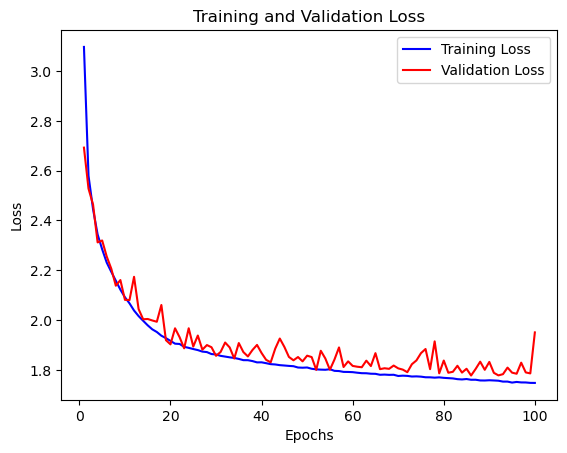

In [6]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)


plt.figure()
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val_reshaped,y_pred))
print(r2_score(y_val_reshaped,y_pred))

1.7654963178537173
0.632832969514146


In [18]:
import numpy as np

# Assuming you have already trained the model and made predictions on x_test_split
y_pred = model.predict(x_val_reshaped)

# Calculate the standard deviation of the predictions
std_deviation = np.std(y_pred)

print("Standard Deviation of Predictions:", std_deviation)

1009/1009 [==============================] - 1s 747us/step
Standard Deviation of Predictions: 2.094049


In [8]:

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)

print("Mean Absolute Error:", mae)


4033/4033 [==============================] - 3s 662us/step
Mean Absolute Error: 0.742599252730176


In [5]:


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(500,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(75, activation='linear')  
])

model.compile(loss='mean_squared_error', optimizer='adam')


x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
y_train_reshaped = y_train.reshape((y_train.shape[0], y_train.shape[1]))

start_time = time.time()


history = model.fit(x_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))


Epoch 1/100
3226/3226 [==============================] - 5s 1ms/step - loss: 2.9934 - val_loss: 2.7205
Epoch 2/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.5763 - val_loss: 2.5132
Epoch 3/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.4479 - val_loss: 2.4264
Epoch 4/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.3543 - val_loss: 2.3531
Epoch 5/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.2849 - val_loss: 2.2671
Epoch 6/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.2280 - val_loss: 2.2809
Epoch 7/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.1709 - val_loss: 2.3491
Epoch 8/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.1251 - val_loss: 2.1284
Epoch 9/100
3226/3226 [==============================] - 4s 1ms/step - loss: 2.0839 - val_loss: 2.0655
Epoch 10/100
3226/3226 [==============================] - 4s 1ms/step - l

In [7]:
import psutil

def get_memory_used():
    process = psutil.Process()
    memory_info = process.memory_info()
    memory_used = memory_info.rss  
    return memory_used

if __name__ == "__main__":
    memory_used = get_memory_used()
    print(f"Memory Used: {memory_used} bytes")

Memory Used: 1891082240 bytes


In [8]:
print("shape of min_m:",min_m.shape)
min_m_reshape=min_m.reshape(-1,5)
print("min_m_reshape=",min_m_reshape.shape)
max_m_reshape=max_m.reshape(-1,5)
print("max_m_reshape=",max_m_reshape.shape)

shape of min_m: (1, 1, 5)
min_m_reshape= (1, 5)
max_m_reshape= (1, 5)


In [9]:
x_test12=np.load('x_in12.npy')
y_test12=np.load('y_op12.npy')
print("x_test12.shape:",x_test12.shape)
print("y_test12.shape:",y_test12.shape)


x_test12.shape: (16046, 100, 5)
y_test12.shape: (16046, 15, 5)


In [10]:
start_time = time.time()

In [11]:
x_norm=(x_vel-min_m_reshape)/(max_m_reshape-min_m_reshape)
print(x_norm)

[[[0.38765795 0.58969688 0.42375179 0.48870756 0.46259281]
  [0.38739463 0.59237653 0.42410159 0.48742557 0.46261372]
  [0.3871609  0.59539077 0.4243439  0.48479041 0.46257292]
  ...
  [0.38790225 0.56091452 0.42446442 0.48192887 0.46226199]
  [0.38789715 0.56205711 0.42421482 0.48784657 0.4622558 ]
  [0.38796273 0.56361785 0.4239423  0.49314905 0.46224572]]

 [[0.38766183 0.56741378 0.42493358 0.48181887 0.46152602]
  [0.38781015 0.5673909  0.42485809 0.48201816 0.46161478]
  [0.38788976 0.56734707 0.42478618 0.48181225 0.46176757]
  ...
  [0.38708791 0.56916995 0.42448228 0.48934221 0.46178264]
  [0.38709125 0.56916124 0.42445797 0.48931752 0.46178138]
  [0.38710129 0.56924601 0.42442869 0.48934716 0.46178796]]

 [[0.38790454 0.55294813 0.42468149 0.47845723 0.46259024]
  [0.388121   0.5503684  0.4247146  0.4782455  0.46245642]
  [0.38831065 0.5496891  0.4247228  0.47821978 0.46248794]
  ...
  [0.38757281 0.5577934  0.42431298 0.48356047 0.462911  ]
  [0.38797315 0.56277446 0.4241534

In [12]:
x_test12_reshape= x_test12.reshape(-1, 500)
print("x_test12_reshape shape:",x_test12_reshape.shape)
y_test12_reshape= y_test12.reshape(-1, 75)
print("y_test12_reshape shape:",y_test12_reshape.shape)

x_test12_reshape shape: (16046, 500)
y_test12_reshape shape: (16046, 75)


In [17]:
y_pred_test = model.predict(x_val_reshaped)

NameError: name 'x_val_reshaped' is not defined

In [14]:
# Assuming you have consistent number of samples for x_test12, y_test12, and x_val_reshaped
x_norm = (x_vel - min_m_reshape) / (max_m_reshape - min_m_reshape)
print(x_norm)

x_test12_reshape = x_test12.reshape(-1, 500)
print("x_test12_reshape shape:", x_test12_reshape.shape)

y_test12_reshape = y_test12.reshape(-1, 75)
print("y_test12_reshape shape:", y_test12_reshape.shape)

# Make predictions using the model and x_test12_reshape
y_pred_test = model.predict(x_test12_reshape)

# Perform evaluation with consistent number of samples
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test12_reshape, y_pred_test))
print(r2_score(y_test12_reshape, y_pred_test))
print(mean_absolute_error(y_test12_reshape, y_pred_test))



[[[0.38765795 0.58969688 0.42375179 0.48870756 0.46259281]
  [0.38739463 0.59237653 0.42410159 0.48742557 0.46261372]
  [0.3871609  0.59539077 0.4243439  0.48479041 0.46257292]
  ...
  [0.38790225 0.56091452 0.42446442 0.48192887 0.46226199]
  [0.38789715 0.56205711 0.42421482 0.48784657 0.4622558 ]
  [0.38796273 0.56361785 0.4239423  0.49314905 0.46224572]]

 [[0.38766183 0.56741378 0.42493358 0.48181887 0.46152602]
  [0.38781015 0.5673909  0.42485809 0.48201816 0.46161478]
  [0.38788976 0.56734707 0.42478618 0.48181225 0.46176757]
  ...
  [0.38708791 0.56916995 0.42448228 0.48934221 0.46178264]
  [0.38709125 0.56916124 0.42445797 0.48931752 0.46178138]
  [0.38710129 0.56924601 0.42442869 0.48934716 0.46178796]]

 [[0.38790454 0.55294813 0.42468149 0.47845723 0.46259024]
  [0.388121   0.5503684  0.4247146  0.4782455  0.46245642]
  [0.38831065 0.5496891  0.4247228  0.47821978 0.46248794]
  ...
  [0.38757281 0.5577934  0.42431298 0.48356047 0.462911  ]
  [0.38797315 0.56277446 0.4241534

In [15]:
import numpy as np

# Assuming you have already trained the model and made predictions on x_test_split
y_pred = model.predict(x_test12_reshape)

# Calculate the standard deviation of the predictions
std_deviation = np.std(y_pred_test)

print("Standard Deviation of Predictions:", std_deviation)

502/502 [==============================] - 0s 631us/step
Standard Deviation of Predictions: 88.073494


In [18]:
import psutil

def get_memory_used():
    process =s()
    memory_info = process.memory_info()
    memory_used = memory_info.rss  
    return memory_used

if __name__ == "__main__":
    memory_us
    if i >0:
        print(lstm_std)
        for i in range (0,num,i):
            for j in range (0,len(num),std):
                print("process().s")

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ed = get_memory_used()
    print(f"Memory Used: {memory_used} bytes")

NameError: name 'memory_us' is not defined